In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np


11490434/11490434 [==============================] - 2s 0us/step


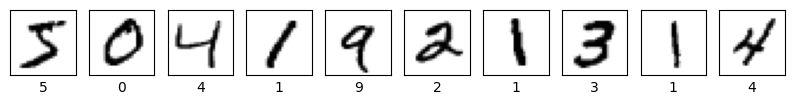

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Виберіть кілька зразків з набору даних
num_samples = 10
samples = train_images[:num_samples]

# Візуалізуйте зображення
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2868 - accuracy: 0.9186 - val_loss: 0.1638 - val_accuracy: 0.9535
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9624 - val_loss: 0.1183 - val_accuracy: 0.9653
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9734 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 0.0922 - val_accuracy: 0.9723
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0951 - val_accuracy: 0.9722


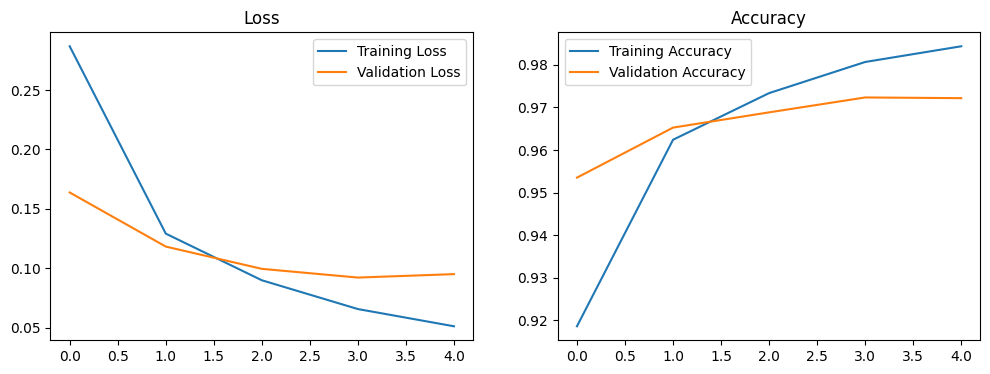

313/313 [==============================] - 1s 1ms/step - loss: 0.0779 - accuracy: 0.9765


In [5]:

training_history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)
# Візуалізація історії тренування
plt.figure(figsize=(12, 4))

# Втрати
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Точність
plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 0s 1ms/step


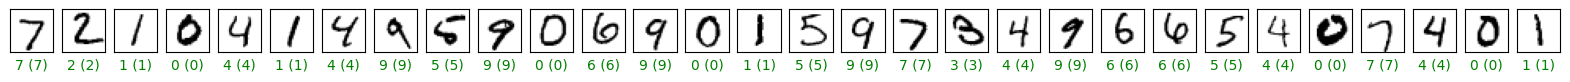

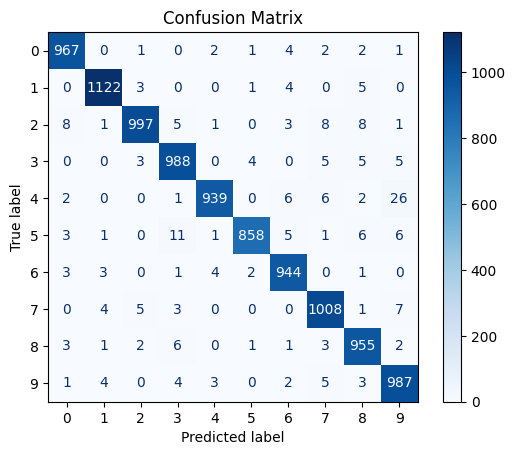

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Отримання передбачень моделі
predictions = model.predict(test_images)

# Конвертування ймовірностей у мітки класів
predicted_labels = np.argmax(predictions, axis=1)

# Візуалізація передбачень
num_test_samples = 30
test_samples = test_images[:num_test_samples]

plt.figure(figsize=(20, 20))
for i in range(num_test_samples):
    plt.subplot(1, num_test_samples, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_samples[i], cmap=plt.cm.binary)
    predicted_label = predicted_labels[i]
    true_label = test_labels[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

# Візуалізація конфузійної матриці
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
